<a href="https://colab.research.google.com/github/Jameslorry6666/Micheal.iml/blob/master/ANOMALY_DETECTION_Elliptic_Envelope_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [29]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [30]:
df = pd.read_csv('/content/gdrive/MyDrive/Datasets/df_drop.csv')


In [31]:
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
4,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
350,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
351,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
352,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [32]:
X = df
X

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
4,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
350,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
351,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
352,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [33]:
#converting the string variable to float
X = df[['Age','nWBV']]
X

,Age,nWBV
0,87,0.696
1,88,0.681
2,88,0.710
3,90,0.718
4,80,0.712
...,...,...
349,82,0.694
350,86,0.675
351,61,0.801
352,63,0.796


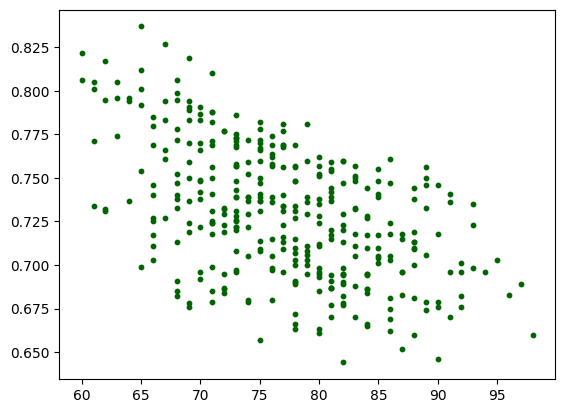

In [34]:
plt.scatter(X.values[:, 0], X.values[:, 1], marker="o", s=10, color='darkgreen')

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_norm = scaler.fit_transform(X)
X_norm

array([[0.71052632, 0.26943005],
       [0.73684211, 0.19170984],
       [0.73684211, 0.34196891],
       [0.78947368, 0.38341969],
       [0.52631579, 0.35233161],
       [0.60526316, 0.34715026],
       [0.65789474, 0.31606218],
       [0.86842105, 0.27979275],
       [0.92105263, 0.30569948],
       [0.21052632, 0.83937824],
       [0.23684211, 0.76165803],
       [0.15789474, 0.64766839],
       [0.21052632, 0.55958549],
       [0.47368421, 0.5388601 ],
       [0.52631579, 0.48704663],
       [0.60526316, 0.38341969],
       [0.55263158, 0.36787565],
       [0.57894737, 0.39378238],
       [0.65789474, 0.34196891],
       [0.42105263, 0.2746114 ],
       [0.44736842, 0.26943005],
       [0.73684211, 0.08290155],
       [0.78947368, 0.01036269],
       [0.52631579, 0.55958549],
       [0.55263158, 0.59585492],
       [0.65789474, 0.57512953],
       [0.68421053, 0.60621762],
       [0.71052632, 0.36787565],
       [0.73684211, 0.35751295],
       [0.84210526, 0.26943005],
       [0.

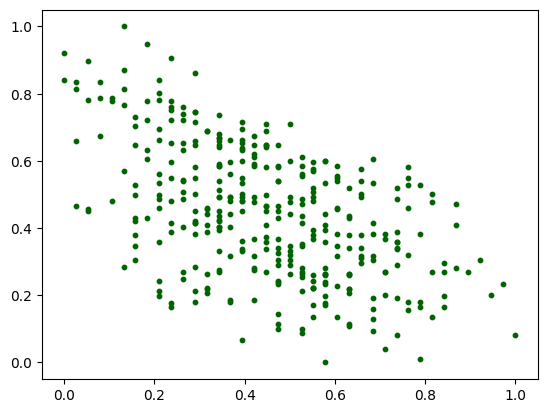

In [36]:
plt.scatter(X_norm[:, 0], X_norm[:, 1], marker="o", s=10, color='darkgreen')

In [37]:
from sklearn.covariance import EllipticEnvelope
elliptic_envelope_algorithm = EllipticEnvelope(contamination=0.05)

elliptic_envelope_algorithm.fit(X_norm)
elliptic_envelope_y_pred = elliptic_envelope_algorithm.predict(X_norm)

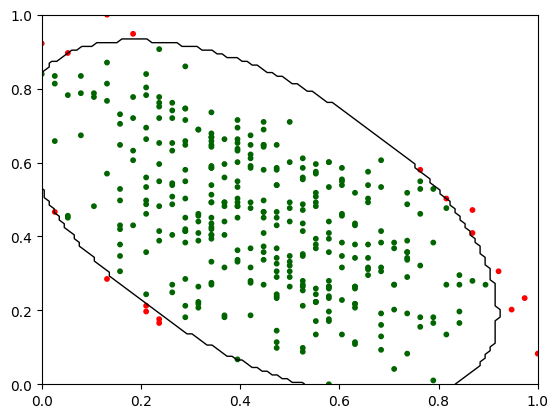

In [38]:
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
Z = elliptic_envelope_algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
colors = np.array(['red', 'darkgreen'])
plt.scatter(X_norm[:, 0], X_norm[:, 1], s=10, color=colors[(elliptic_envelope_y_pred + 1) // 2])
plt.contour(xx, yy, Z, levels=[0], linewidths=1, colors="black")

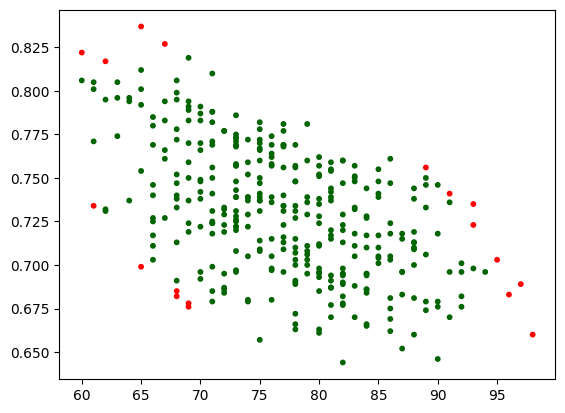

In [39]:
plt.scatter(X.values[:, 0], X.values[:, 1], s=10, color=colors[(elliptic_envelope_y_pred + 1) // 2])

In [40]:
xx_reshaped = xx.reshape(xx.shape[0]*xx.shape[1])
yy_reshaped = yy.reshape(yy.shape[0]*yy.shape[1])
points = np.c_[xx_reshaped, yy_reshaped]
print(points.shape)

(10000, 2)


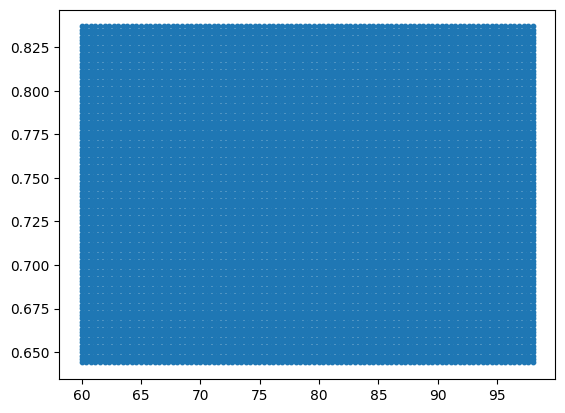

In [41]:
points_inv_transformed = scaler.inverse_transform(points)
plt.scatter(points_inv_transformed[:, 0], points_inv_transformed[:, 1], s=10)

In [42]:
xx_inv_transformed = points_inv_transformed[:, 0]
xx_original_scale = xx_inv_transformed.reshape(xx.shape)
yy_inv_transformed = points_inv_transformed[:, 1]
yy_original_scale = yy_inv_transformed.reshape(yy.shape)

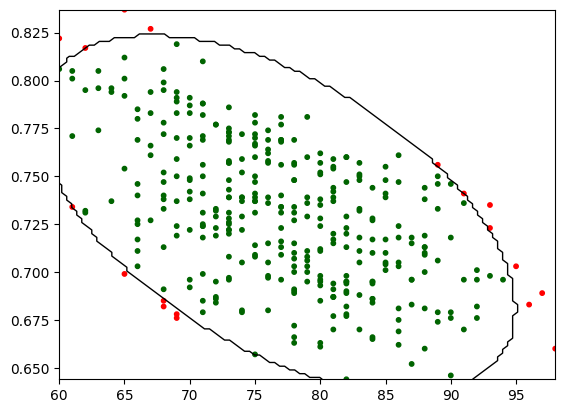

In [43]:
plt.scatter(X.values[:, 0], X.values[:, 1], s=10, color=colors[(elliptic_envelope_y_pred + 1) // 2])
plt.contour(xx_original_scale, yy_original_scale, Z, levels=[0], linewidths=1, colors="black")

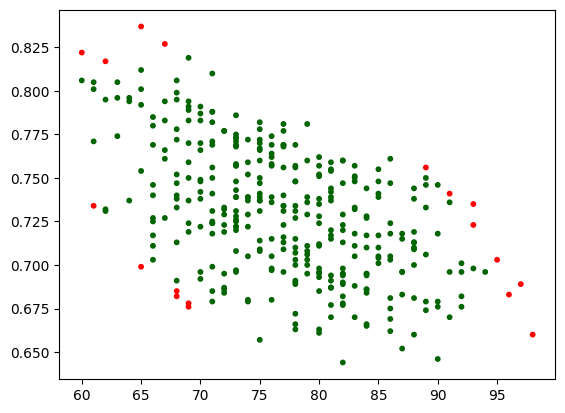

In [44]:
plt.scatter(X.values[:, 0], X.values[:, 1], s=10, color=colors[(elliptic_envelope_y_pred + 1) // 2])

In [45]:
xx_reshaped = xx.reshape(xx.shape[0]*xx.shape[1])
yy_reshaped = yy.reshape(yy.shape[0]*yy.shape[1])
points = np.c_[xx_reshaped, yy_reshaped]
print(points.shape)

(10000, 2)


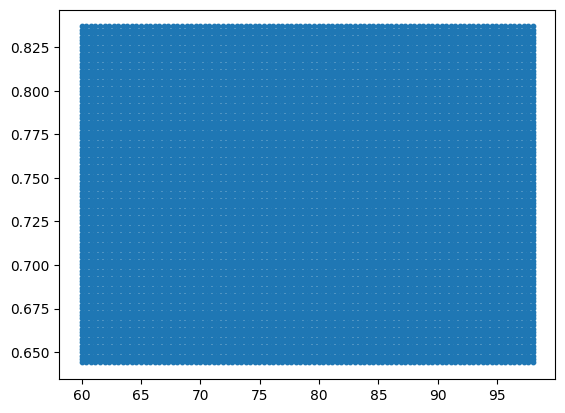

In [46]:
points_inv_transformed = scaler.inverse_transform(points)
plt.scatter(points_inv_transformed[:, 0], points_inv_transformed[:, 1], s=10)

In [47]:
xx_inv_transformed = points_inv_transformed[:, 0]
xx_original_scale = xx_inv_transformed.reshape(xx.shape)
yy_inv_transformed = points_inv_transformed[:, 1]
yy_original_scale = yy_inv_transformed.reshape(yy.shape)

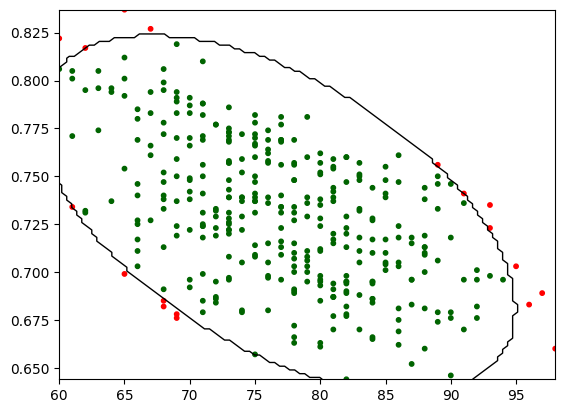

In [48]:
plt.scatter(X.values[:, 0], X.values[:, 1], s=10, color=colors[(elliptic_envelope_y_pred + 1) // 2])
plt.contour(xx_original_scale, yy_original_scale, Z, levels=[0], linewidths=1, colors="black")